# Stage E Quiz: Time series Analysis & Forecast

Install packages:

In [32]:
#!pip install fbprophet
#import prophet
!pip install prophet
from prophet import Prophet

In [7]:
import pandas as pd
import csv
import matplotlib.pyplot as plt


## Uploading the dataset:

In [10]:
df=pd.read_csv("Time_series_analysis_and_forecast_DATASET.csv", quoting=csv.QUOTE_NONE, error_bad_lines=False )


<ipython-input-10-08dfe06c92c3>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df=pd.read_csv("Time_series_analysis_and_forecast_DATASET.csv", quoting=csv.QUOTE_NONE, error_bad_lines=False )


In [11]:
df

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.21500,3.6900,23.710
1,2010-09-01 01:00:00,15.8,1669.19500,3.6900,22.635
2,2010-09-01 02:00:00,15.8,1491.98000,3.6900,22.565
3,2010-09-01 03:00:00,15.8,1330.76000,3.6900,18.910
4,2010-09-01 04:00:00,15.8,1247.94000,3.6900,18.030
...,...,...,...,...,...
92011,2021-02-28 19:00:00,24.3,449.63625,5.4848,117.925
92012,2021-02-28 20:00:00,24.3,815.59975,5.4848,87.880
92013,2021-02-28 21:00:00,24.3,745.12325,5.4848,62.060
92014,2021-02-28 22:00:00,24.3,694.95150,5.4848,62.000


Convert the FullDate column into datetime

In [12]:
df['FullDate'] = pd.to_datetime(df['FullDate'])


Searching for null values:

In [ ]:
df.isnull().values.any()


False

Rename columns and apply a daily sampling rate(sum):

In [13]:
df_new = df.rename(columns={ "FullDate" : "ds" , "ElecPrice" : "y" })
df_new = df_new.set_index('ds')
df_daily = df_new.resample( 'D' ).sum()

In [72]:
df_daily

,Tmax,SysLoad,GasPrice,y
ds,,,,
2010-09-01,379.2,41565.38000,88.5600,2751.700
2010-09-02,369.6,38898.99000,88.5600,570.810
2010-09-03,439.2,41665.76000,106.8000,504.975
2010-09-04,328.8,35638.08500,81.3600,502.275
2010-09-05,357.6,35611.41000,106.8000,500.555
...,...,...,...,...
2021-02-24,537.6,-1525.49745,134.4000,634.770
2021-02-25,518.4,4539.07855,130.5048,577.515
2021-02-26,547.2,9517.02430,130.1808,1445.495


## Question 11

Text(0, 0.5, 'Electric Price')

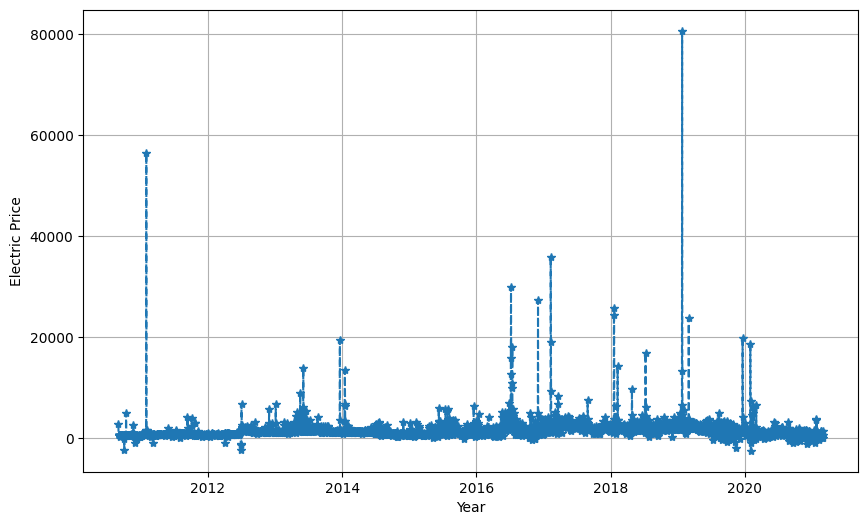

In [63]:
plt.figure(figsize=( 10 , 6 ))
plt.plot(df_daily.index, df_daily.y, '--' , marker= '*' , )
plt.grid()
plt.xlabel( 'Year' )
plt.ylabel( 'Electric Price' )


## Question 12


In [70]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df_daily['SysLoad'])
print('ADF Statistic:', adf_result[ 0 ] )
print( 'p-value:', adf_result[ 1 ] )



ADF Statistic: -3.6901589888366493
p-value: 0.004253725504574063


In [66]:
adf_result = adfuller(df_daily['GasPrice'])
print('ADF Statistic:', adf_result[ 0 ] )
print( 'p-value:', adf_result[ 1 ] )

ADF Statistic: -2.902766697165179
p-value: 0.04502721288462552


## Question 13

In [68]:
from statsmodels.tsa.stattools import adfuller
#10% GasPrice
adf_result = adfuller(df_daily['GasPrice'])
print( 'Critical Values:' )
for k, v in adf_result[ 4 ].items():
    print( k, v )

Critical Values:
1% -3.4320693157877544
5% -2.8622996992165364
10% -2.5671743978048323


In [71]:
from statsmodels.tsa.stattools import adfuller
#5% ElecPrice
adf_result = adfuller(df_daily['y'])
print( 'Critical Values:' )
for k, v in adf_result[ 4 ].items():
    print( k, v )

Critical Values:
1% -3.432066157296446
5% -2.8622983040036005
10% -2.5671736550459663


## Split in train and test

In [151]:
train=df_daily[0:2757]

In [ ]:
train

,Tmax,SysLoad,GasPrice,y
ds,,,,
2010-09-01,379.2,41565.38000,88.5600,2751.700
2010-09-02,369.6,38898.99000,88.5600,570.810
2010-09-03,439.2,41665.76000,106.8000,504.975
2010-09-04,328.8,35638.08500,81.3600,502.275
2010-09-05,357.6,35611.41000,106.8000,500.555
...,...,...,...,...
2018-03-15,609.6,27139.02585,220.6272,2717.340
2018-03-16,648.0,19710.46400,216.9600,2277.335
2018-03-17,724.8,1079.34705,209.0400,1718.385


In [149]:
test=df_daily[2757:]

In [150]:
test

,Tmax,SysLoad,GasPrice,y
ds,,,,
2018-03-20,540.0,7696.91130,201.5880,1833.000
2018-03-21,571.2,4658.05865,203.2560,1730.490
2018-03-22,722.4,19161.78525,203.2560,2260.550
2018-03-23,811.2,18090.43435,198.6456,2138.760
2018-03-24,832.8,3763.53865,180.2160,1721.700
...,...,...,...,...
2021-02-24,537.6,-1525.49745,134.4000,634.770
2021-02-25,518.4,4539.07855,130.5048,577.515
2021-02-26,547.2,9517.02430,130.1808,1445.495


## Applying Prophet

In [152]:

train=train.reset_index()

In [177]:
model = Prophet()
#model.fit(train[['ds','y']])
model.fit(train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplzrg_f2n/3j2n1gl5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplzrg_f2n/sdlfrici.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25269', 'data', 'file=/tmp/tmplzrg_f2n/3j2n1gl5.json', 'init=/tmp/tmplzrg_f2n/sdlfrici.json', 'output', 'file=/tmp/tmplzrg_f2n/prophet_modelbrcmjvul/prophet_model-20230801181546.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:15:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:15:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [156]:
test=test.reset_index()

In [157]:
test

,ds,Tmax,SysLoad,GasPrice,y
0,2018-03-20,540.0,7696.91130,201.5880,1833.000
1,2018-03-21,571.2,4658.05865,203.2560,1730.490
2,2018-03-22,722.4,19161.78525,203.2560,2260.550
3,2018-03-23,811.2,18090.43435,198.6456,2138.760
4,2018-03-24,832.8,3763.53865,180.2160,1721.700
...,...,...,...,...,...
1072,2021-02-24,537.6,-1525.49745,134.4000,634.770
1073,2021-02-25,518.4,4539.07855,130.5048,577.515
1074,2021-02-26,547.2,9517.02430,130.1808,1445.495
1075,2021-02-27,564.0,4932.88015,130.0800,488.980


In [178]:
#forecast = model.predict(test['ds','y'])
forecast = model.predict(test.drop(columns="y"))

In [161]:
forecast.head(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,2684.522366,111.505320,4931.050175,2684.522366,2684.522366,-157.277098,-157.277098,-157.277098,9.755659,9.755659,9.755659,-167.032757,-167.032757,-167.032757,0.0,0.0,0.0,2527.245268
1,2018-03-21,2685.313840,245.952144,4995.893530,2685.313840,2685.313840,-4.693954,-4.693954,-4.693954,159.421504,159.421504,159.421504,-164.115459,-164.115459,-164.115459,0.0,0.0,0.0,2680.619886
2,2018-03-22,2686.105314,441.469530,5121.419752,2686.105314,2686.105314,93.604040,93.604040,93.604040,257.239178,257.239178,257.239178,-163.635138,-163.635138,-163.635138,0.0,0.0,0.0,2779.709354
3,2018-03-23,2686.896788,69.790993,4870.890763,2686.896788,2686.896788,-115.130706,-115.130706,-115.130706,50.294929,50.294929,50.294929,-165.425635,-165.425635,-165.425635,0.0,0.0,0.0,2571.766082
4,2018-03-24,2687.688263,-303.842252,4704.205169,2687.688263,2687.688263,-440.838320,-440.838320,-440.838320,-271.594004,-271.594004,-271.594004,-169.244315,-169.244315,-169.244315,0.0,0.0,0.0,2246.849943


## Question 14

In [106]:
#function
m=[]
def MAPE(Y_act, Y_pred):
    for i in range(len(Y_act)):
      err=((Y_act[i] - Y_pred[i])/Y_act[i])
      err=abs(err)
      m.append(err)
    mape=(sum(m)/len(m))*100
    return mape


In [179]:
#sklearn
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(test['y'], forecast['yhat'])*100

544.0932873825628

In [180]:
MAPE(test['y'], forecast['yhat'])

454.77525467962636

## Question 15

In [117]:
import math
rm=[]
def RMSE(Y_act, Y_pred):
    for i in range(len(Y_act)):
      err=(Y_act[i] - Y_pred[i])
      err=abs(err)**2
      rm.append(err)
    rmse=math.sqrt(sum(rm)/len(rm))
    return rmse

In [163]:
RMSE(test['y'], forecast['yhat'])

3207.4615275657484

In [181]:
#scikit learn
from sklearn.metrics import mean_squared_error

mean_squared_error(test['y'], forecast['yhat'], squared=False)

3207.4615275657525

## Question `16`

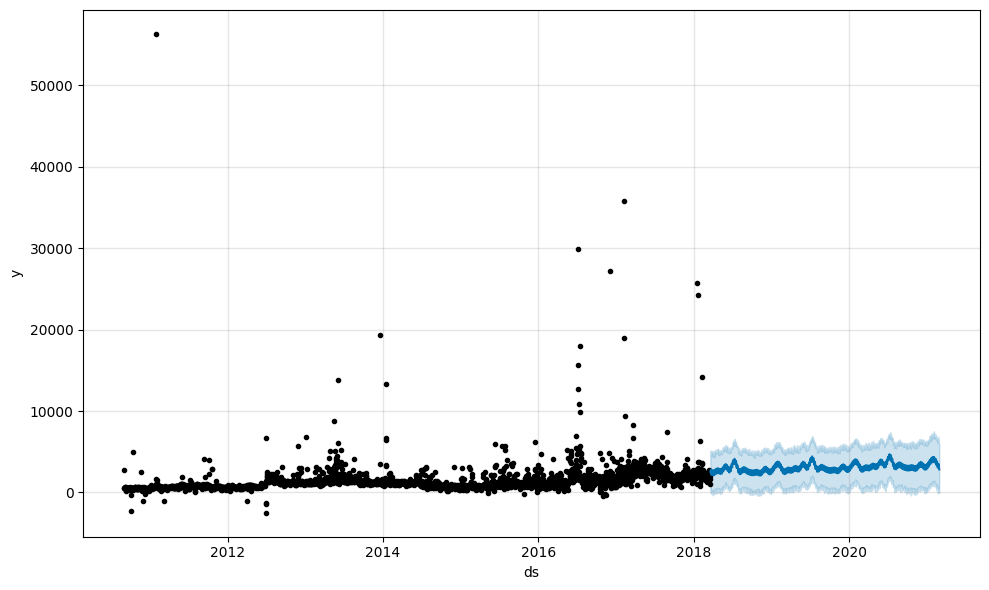

In [182]:
model.plot(forecast)
plt.show()


## Question 17

Renaming and daily sampling:

In [127]:
df_new2 = df.rename(columns={ "FullDate": "ds" ,"SysLoad" : "add1" , "Tmax" : "add2","GasPrice": "add3" ,"ElecPrice" : "y" })
df_new2 = df_new2.set_index('ds')
df_daily2 = df_new2.resample( 'D' ).sum()

In [128]:
train2=df_daily2[0:2757]

In [129]:
test2=df_daily2[2757:]

In [130]:
train2=train2.reset_index()

In [184]:
modelf = Prophet()
modelf.add_regressor('add1')
modelf.add_regressor('add2')
modelf.add_regressor('add3')
#modelf.fit(train2[['ds','add1','add2','add3','y']])
modelf.fit(train2)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplzrg_f2n/bi3rxsod.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplzrg_f2n/az3io2q2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9159', 'data', 'file=/tmp/tmplzrg_f2n/bi3rxsod.json', 'init=/tmp/tmplzrg_f2n/az3io2q2.json', 'output', 'file=/tmp/tmplzrg_f2n/prophet_modelqg0gxvwv/prophet_model-20230801182008.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:20:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:20:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [139]:
test2=test2.reset_index()

In [185]:
#forecast2 = modelf.predict(test2[['ds','add1','add2','add3']])
forecast2 = modelf.predict(test2.drop(columns="y"))

In [186]:
MAPE(test2['y'], forecast2['yhat'])

426.8633694599588

In [187]:
#sklearn
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(test2['y'], forecast2['yhat'])*100

231.4801729222889

## Question 18

In [188]:
RMSE(test2['y'], forecast2['yhat'])

2967.87021823757

## Question 19

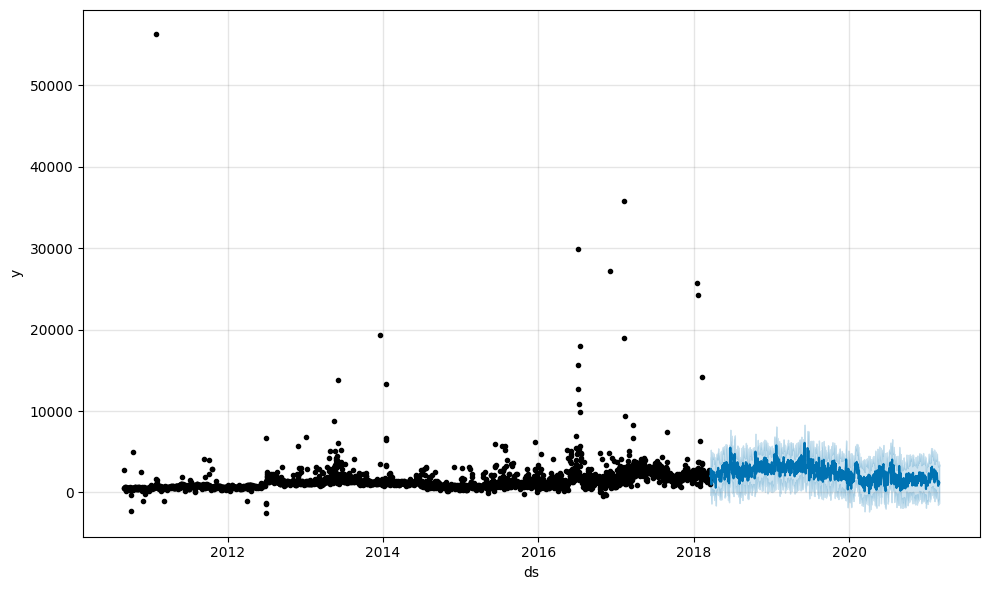

In [189]:
modelf.plot(forecast2)
plt.show()

## Question 20

In [190]:
df_new3 = df.rename(columns={ "FullDate": "ds" ,"SysLoad" : "add1" , "GasPrice": "add2" ,"ElecPrice" : "y" })
df_new3 = df_new3.set_index('ds')
df_daily3 = df_new3.resample( 'D' ).sum()

In [191]:
train3=df_daily3[0:2757]

In [192]:
test3=df_daily3[0:2757]

In [196]:
train3=train3.reset_index()

In [197]:
test3=test3.reset_index()

In [198]:
modelm = Prophet()
modelm.add_regressor('add1')
modelm.add_regressor('add2')
#modelf.fit(train2[['ds','add1','add2','y']])
modelm.fit(train3.drop(columns="Tmax"))

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplzrg_f2n/70wdy58o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplzrg_f2n/4w44gf1q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48981', 'data', 'file=/tmp/tmplzrg_f2n/70wdy58o.json', 'init=/tmp/tmplzrg_f2n/4w44gf1q.json', 'output', 'file=/tmp/tmplzrg_f2n/prophet_modelrvidex0h/prophet_model-20230801183125.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:31:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:31:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [199]:
forecast3 = modelm.predict(test3.drop(columns=["y","Tmax"]))

In [200]:
MAPE(test3['y'], forecast3['yhat'])

335.5049957163184